# IMPORT THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# LOAD THE DATASET

In [85]:
data=pd.read_csv("Mall_Customers.csv")

In [86]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
data.shape

(200, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# UNIVARITE ANALYSIS

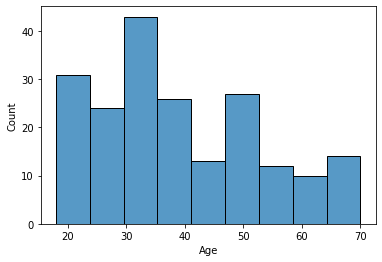

In [10]:
sns.histplot(data["Age"])

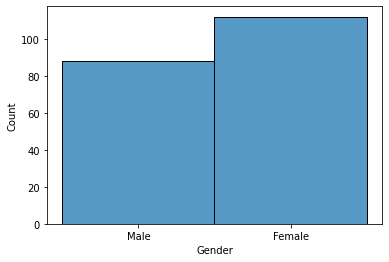

In [11]:
sns.histplot(data["Gender"])

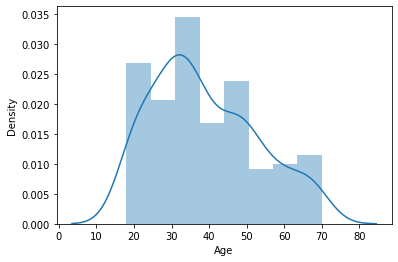

In [13]:
sns.distplot(data["Age"])

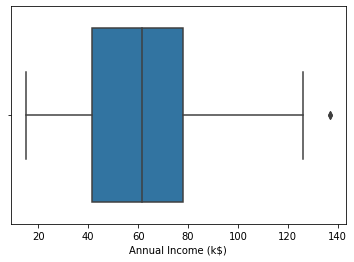

In [14]:
sns.boxplot(data["Annual Income (k$)"])

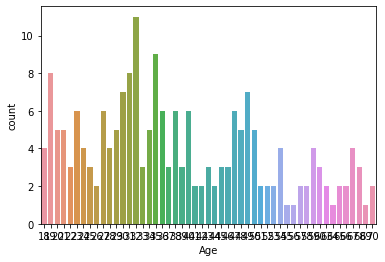

In [16]:
sns.countplot(data["Age"])

# BIVARITE ANALYSIS

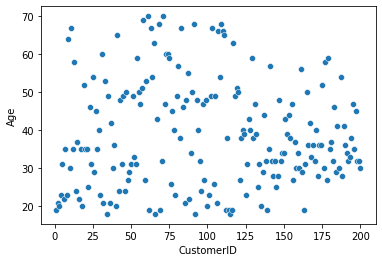

In [17]:
sns.scatterplot(data.CustomerID,data.Age)

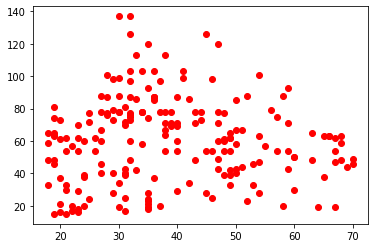

In [40]:
plt.scatter(data['Age'],data['Annual Income (k$)'],color='red')

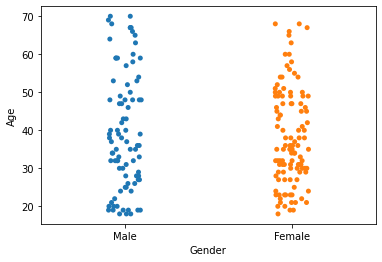

In [39]:
sns.stripplot(data.Gender,data.Age)

# MULTI-VARIATE ANALYSIS

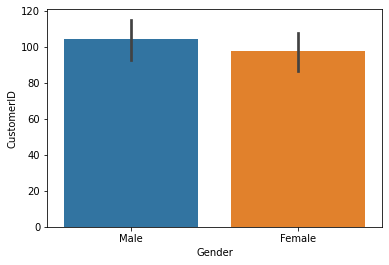

In [42]:
sns.barplot(data.Gender,data.CustomerID)

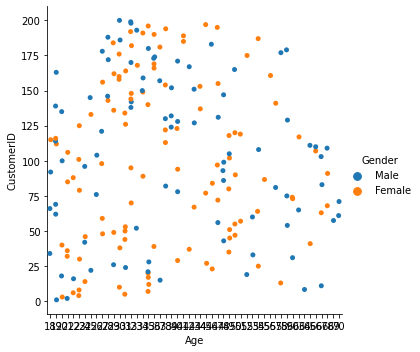

In [43]:
sns.catplot(x='Age',y='CustomerID',hue='Gender',data=data)

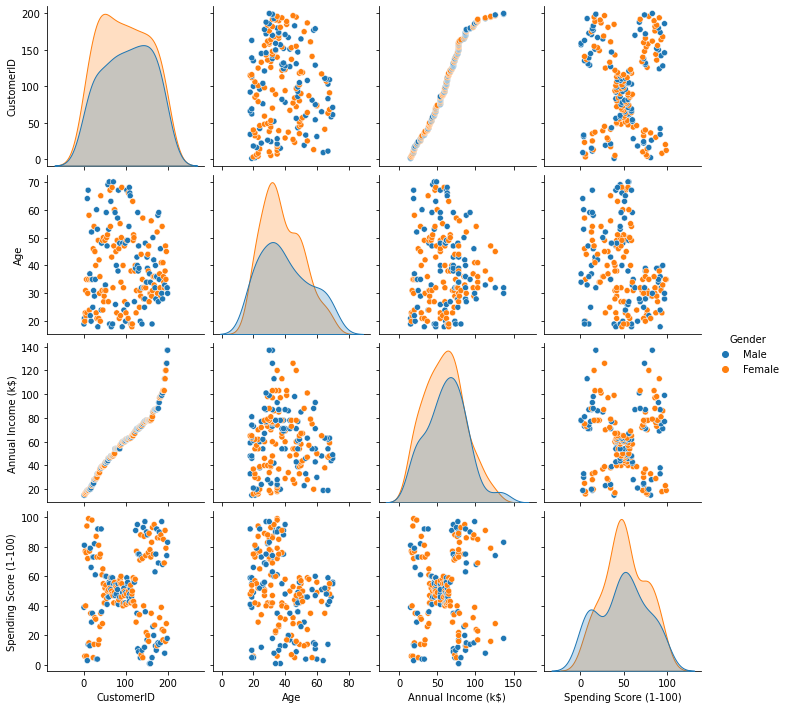

In [44]:
sns.pairplot(data=data,hue='Gender')

# PERFORM DESCRIPTIVE STATISTICS ON THE DATASET

In [45]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [46]:
data.skew()

CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [47]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [48]:
data.kurtosis()

CustomerID               -1.200000
Age                      -0.671573
Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
dtype: float64

In [49]:
print("Mean:",data['Age'].mean())

Mean: 38.85


In [53]:
print("Median:",data['Age'].median())

Median: 36.0


In [52]:
print("Mode:",data['Age'].mode())

Mode: 0    32
dtype: int64


In [54]:
print("Standard Deviation",data['Age'].std())


Standard Deviation 13.96900733155888


# CHECKING FOR MISSING VALUES

In [55]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [56]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

# FIND THE OUTLIERS AND REPLACE THE OUTLIERS

In [61]:
iq=data.quantile(q=[0.1,0.2,0.3])
iq

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.1,20.9,21.0,23.9,13.0
0.2,40.8,26.8,37.8,26.0
0.3,60.7,30.0,46.0,40.0


In [62]:
iq.iloc[0]
iq.iloc[1]
IQR = iq.iloc[0] - iq.iloc[1]
upper_extrem = iq.iloc[0] + ( 1.5 * IQR)  
lower_extrem = iq.iloc[1] - ( 1.5 * IQR)   
upper_extrem

CustomerID                -8.95
Age                       12.30
Annual Income (k$)         3.05
Spending Score (1-100)    -6.50
dtype: float64

In [63]:
lower_extrem

CustomerID                70.65
Age                       35.50
Annual Income (k$)        58.65
Spending Score (1-100)    45.50
dtype: float64

# CHECK CATEGORICAL COLUMNS AND PERFORM ENCODING

In [87]:
from sklearn.preprocessing import LabelEncoder

In [88]:
le = LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])

In [89]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [90]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# SCALING THE DATA

In [106]:
from sklearn.preprocessing import StandardScaler

In [111]:
X = data.drop("CustomerID",axis=1)
Y = data["CustomerID"]

In [112]:
object= StandardScaler()
scale = object.fit_transform(X) 
print(scale)

[[ 1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [ 1.12815215 -1.28103541 -1.73899919  1.19570407]
 [-0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [-0.88640526 -1.13750203 -1.70082976  1.04041783]
 [-0.88640526 -0.56336851 -1.66266033 -0.39597992]
 [-0.88640526 -1.20926872 -1.66266033  1.00159627]
 [-0.88640526 -0.27630176 -1.62449091 -1.71591298]
 [-0.88640526 -1.13750203 -1.62449091  1.70038436]
 [ 1.12815215  1.80493225 -1.58632148 -1.83237767]
 [-0.88640526 -0.6351352  -1.58632148  0.84631002]
 [ 1.12815215  2.02023231 -1.58632148 -1.4053405 ]
 [-0.88640526 -0.27630176 -1.58632148  1.89449216]
 [-0.88640526  1.37433211 -1.54815205 -1.36651894]
 [-0.88640526 -1.06573534 -1.54815205  1.04041783]
 [ 1.12815215 -0.13276838 -1.54815205 -1.44416206]
 [ 1.12815215 -1.20926872 -1.54815205  1.11806095]
 [-0.88640526 -0.27630176 -1.50998262 -0.59008772]
 [ 1.12815215 -1.3528021  -1.50998262  0.61338066]
 [ 1.12815215  0.94373197 -1.43364376 -0.82301709]
 [-0.88640526 -0.27630176 -1.43

In [114]:
x = data[["Annual Income (k$)","Age"]]
scale = StandardScaler()
st_scale = scale.fit_transform(x)
st_scale

array([[-1.73899919, -1.42456879],
       [-1.73899919, -1.28103541],
       [-1.70082976, -1.3528021 ],
       [-1.70082976, -1.13750203],
       [-1.66266033, -0.56336851],
       [-1.66266033, -1.20926872],
       [-1.62449091, -0.27630176],
       [-1.62449091, -1.13750203],
       [-1.58632148,  1.80493225],
       [-1.58632148, -0.6351352 ],
       [-1.58632148,  2.02023231],
       [-1.58632148, -0.27630176],
       [-1.54815205,  1.37433211],
       [-1.54815205, -1.06573534],
       [-1.54815205, -0.13276838],
       [-1.54815205, -1.20926872],
       [-1.50998262, -0.27630176],
       [-1.50998262, -1.3528021 ],
       [-1.43364376,  0.94373197],
       [-1.43364376, -0.27630176],
       [-1.39547433, -0.27630176],
       [-1.39547433, -0.99396865],
       [-1.3573049 ,  0.51313183],
       [-1.3573049 , -0.56336851],
       [-1.24279661,  1.08726535],
       [-1.24279661, -0.70690189],
       [-1.24279661,  0.44136514],
       [-1.24279661, -0.27630176],
       [-1.20462718,

In [117]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range=(0,1))
n= min_max.fit_transform(x)
n

array([[0.        , 0.01923077],
       [0.        , 0.05769231],
       [0.00819672, 0.03846154],
       [0.00819672, 0.09615385],
       [0.01639344, 0.25      ],
       [0.01639344, 0.07692308],
       [0.02459016, 0.32692308],
       [0.02459016, 0.09615385],
       [0.03278689, 0.88461538],
       [0.03278689, 0.23076923],
       [0.03278689, 0.94230769],
       [0.03278689, 0.32692308],
       [0.04098361, 0.76923077],
       [0.04098361, 0.11538462],
       [0.04098361, 0.36538462],
       [0.04098361, 0.07692308],
       [0.04918033, 0.32692308],
       [0.04918033, 0.03846154],
       [0.06557377, 0.65384615],
       [0.06557377, 0.32692308],
       [0.07377049, 0.32692308],
       [0.07377049, 0.13461538],
       [0.08196721, 0.53846154],
       [0.08196721, 0.25      ],
       [0.10655738, 0.69230769],
       [0.10655738, 0.21153846],
       [0.10655738, 0.51923077],
       [0.10655738, 0.32692308],
       [0.1147541 , 0.42307692],
       [0.1147541 , 0.09615385],
       [0.

# CLUSTERING ALGORITHM

In [118]:
x = data.iloc[:, [3, 4]].values 

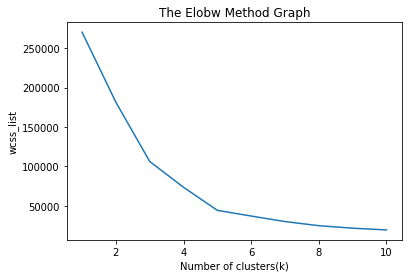

In [122]:
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 40)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

# ADD THE CLUSTER DATA WITH PRIMARY DATA

In [125]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x) 
m=pd.Series(y_predict)
data["Cluster"]=m
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,3
2,3,0,20,16,6,2
3,4,0,23,16,77,3
4,5,0,31,17,40,2
...,...,...,...,...,...,...
195,196,0,35,120,79,4
196,197,0,45,126,28,1
197,198,1,32,126,74,4
198,199,1,32,137,18,1


In [127]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,3
2,3,0,20,16,6,2
3,4,0,23,16,77,3
4,5,0,31,17,40,2


# SPLIT THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLES

In [152]:
x=data.iloc[:,0:3]
x.head()

,CustomerID,Gender,Age
0,1,1,19
1,2,1,21
2,3,0,20
3,4,0,23
4,5,0,31


In [153]:
y = data.iloc[:14, 3].values
y

array([15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 19, 20, 20])

# SPLIT THE DATA INTO TRAINING AND TESTING

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
y = data["Age"]
x = data.drop(columns = ["Age"])

In [130]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [131]:
x_train.head()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100),Cluster
134,135,1,73,5,1
66,67,0,48,50,0
26,27,0,28,32,2
113,114,1,64,46,0
168,169,0,87,27,1


In [132]:
x_test.head()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100),Cluster
18,19,1,23,29,2
170,171,1,87,13,1
107,108,1,63,46,0
98,99,1,61,42,0
177,178,1,88,69,4


In [133]:
y_train.head()

134    20
66     43
26     45
113    19
168    36
Name: Age, dtype: int64

In [134]:
y_test.head()

18     52
170    40
107    54
98     48
177    27
Name: Age, dtype: int64

In [135]:
x_train.shape,x_test.shape

((160, 5), (40, 5))

In [136]:
y_train.shape,y_test.shape

((160,), (40,))

# BUILD THE MODEL

In [137]:
from sklearn.tree import DecisionTreeClassifier

In [138]:
model = DecisionTreeClassifier()

In [139]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

# TRAIN THE MODEL

In [140]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [141]:
pred = model.predict(x_train)
pred

array([20, 43, 45, 19, 36, 54, 64, 26, 51, 32, 47, 23, 41, 27, 34, 54, 60,
       56, 65, 51, 39, 47, 32, 35, 38, 48, 50, 31, 33, 55, 35, 68, 32, 49,
       25, 50, 66, 37, 35, 32, 28, 50, 19, 35, 68, 67, 20, 53, 44, 32, 31,
       67, 47, 60, 45, 59, 30, 43, 40, 38, 34, 32, 49, 19, 32, 65, 24, 63,
       33, 24, 32, 31, 29, 48, 24, 29, 31, 54, 29, 35, 22, 23, 49, 31, 23,
       45, 23, 63, 50, 32, 35, 19, 21, 38, 27, 28, 37, 18, 30, 35, 50, 67,
       21, 69, 18, 21, 27, 19, 48, 21, 25, 36, 20, 36, 31, 59, 30, 59, 49,
       40, 18, 39, 21, 42, 40, 58, 53, 28, 32, 32, 23, 20, 67, 49, 19, 34,
       38, 60, 40, 29, 36, 38, 41, 52, 34, 20, 27, 57, 34, 70, 22, 42, 25,
       30, 26, 68, 33, 49, 27, 36])

In [143]:
print("Accuracy score :",accuracy_score(y_train,pred))
print("Precision score :",precision_score(y_train,pred,average="macro"))

Accuracy score : 1.0
Precision score : 1.0


In [144]:
print(confusion_matrix(y_train,pred))

[[3 0 0 ... 0 0 0]
 [0 6 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


# TEST THE MODEL

In [145]:
pred = model.predict(x_test)
pred

array([35, 58, 66, 20, 32, 59, 20, 25, 35, 34, 18, 32, 45, 41, 24, 24, 24,
       20, 21, 40, 38, 40, 31, 32, 18, 32, 27, 33, 50, 40, 45, 69, 25, 19,
       57, 32, 39, 45, 49, 19])

In [146]:
print("Accuracy score :",accuracy_score(y_test,pred))
print("Precision score :",precision_score(y_test,pred,average="macro"))

Accuracy score : 0.025
Precision score : 0.01282051282051282


In [147]:
print(confusion_matrix(y_test,pred))

[[0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


# MEASURE THE PERFORMANCE USING EVALUTION METRICS

In [151]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
x_train=[5,-1,2,10]
y_test=[3.5,-0.9,2,9.9]
print('RSquared=',r2_score(x_train,y_test))
print('MAE=',mean_absolute_error(x_train,y_test))
print('MSE=',mean_squared_error(x_train,y_test))

RSquared= 0.9656060606060606
MAE= 0.42499999999999993
MSE= 0.5674999999999999
